
---
<big><big><big><big><big><big>Metody uczenia maszynowego</big></big></big></big></big></big>

---





---
<big><big><big><big><big>Metody regresji i metody spadku gradientu</big></big></big></big></big>

---



---

<id=tocheading><big><big><big><big>Spis treści</big></big></big></big>
<div id="toc"></div>

---

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

plt.style.use("fivethirtyeight")

from bokeh.io import gridplot, output_file, show
from bokeh.plotting import figure, output_notebook
from bkcharts import Scatter

In [3]:
output_notebook()
sns.set(font_scale=2.0)

Loading BokehJS ...

In [4]:
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
from sklearn.metrics import classification_report, matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

from sklearn.datasets import load_boston, load_diabetes, load_linnerud
from sklearn.datasets import make_regression
from sklearn.datasets import make_friedman1, make_friedman2, make_friedman3
from sklearn.datasets import make_sparse_uncorrelated
from sklearn.linear_model import LinearRegression, SGDRegressor, RANSACRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, mean_squared_error

In [5]:
from astroML.datasets import fetch_imaging_sample
from sklearn.preprocessing import PolynomialFeatures
from astroML.cosmology import Cosmology
from astroML.datasets import generate_mu_z
from astroML.linear_model import BasisFunctionRegression

Image inclusion
<img src="../../mum_figures/" width="100%">

# Problem regresji
1. __dane__ $$\{(x_i,y_i),i=1,\dots,N\}$$
  * niech (na razie) $y\in\mathbb{R}$
  * dane z jakiejś _nieznanej_ funkcji $F$: $y=F(x)+\eta,\hskip{2em}\eta\sim\mathcal{N}(0,\sigma)$
2. __cel__ model $f$: $$\hat{y}=f(x\mid \theta)$$ gdzie $\theta$ jest wektorem __parametrów__, który __minimalizuje__ koszt $$L(y, \widehat{y})$$

## Model liniowy
* __liniowa__ regresja
  \begin{align}\widehat{y}&=\theta_0+\theta_1x_1+\dots+\theta_Dx_D\\
  &=\theta_0+\theta^T{}x+\eta\\
  &=[\theta_0,\theta]^T[1,x]+\eta\\
  &=\theta^Tx+\eta,
  \end{align}
gdzie $\theta_0$ to _bias_.
* $[1,x]$ to __rozszerzony__ wektor wejściowy
* liniowy, ponieważ kombinacja liniowa
  * zamiast $[1, x]$ może być $\phi_k(x)$ i model
    $$\widehat{y}=\theta_0+\theta_1\phi_1(x)+\dots+\theta_D\phi_D(x)$$

## Metoda minimalnych kwadratów (Least Squares)
1. __funkcja kosztu__
$$L(\theta)=\sum_{i=1}^{N}(y_i-\theta^Tx_i)^2$$ 
  * taka postać nie jest z powietrza!
  * wynika z założenia, że dane są obarczone szumem z rozkładu normalnego $\mathcal{N}(0,\sigma)$
  * inny rozkład szumu da inną postać funkcji kosztu
2. __rozwiązanie__
  * gradient kosztu ze względu na $\theta$
\begin{align}\nabla{}L(\theta)&=\nabla\sum_{i=1}^{N}(y_i-\theta^Tx_i)^2\\
&=2\sum_{i=1}^{N}(y_i-\theta^Tx_i)x_i^T=0
\end{align}
  * przyrównanie do zera
  \begin{align}\left(\sum_ix_ix^T_i\right)\widehat{\theta}&=\sum_ix_iy_i\\
   X^TX\widehat{\theta}&=X^Ty
  \end{align}
  * $y=[y_1,y_2,\dots,y_N]^T$ co daje rozwiązanie __LS__ jako
$$\boxed{
\widehat{\theta}=(X^TX)^{-1}X^Ty\;}$$ 
pod warunkiem istnienia $(X^TX)^{-1}$.

In [6]:
def simple_linear_regression(noise=25):
    fig, ax = plt.subplots(3, 1, figsize=(10, 25))
    n_samples = 500
    bias = 10.0
    dotsize = 15
    X, y, true_coef = make_regression(n_samples=n_samples, n_features=1, 
                                      n_targets=1, bias=bias, noise=noise, 
                                      coef=True)
    ax[0].set_xlim((np.min(X), np.max(X)))
    ax[0].set_ylim((np.min(y), np.max(y)))
    ax[1].set_xlim((np.min(X), np.max(X)))
    ax[1].set_ylim([np.min(y), np.max(y)])
    regr = LinearRegression()
    regr.fit(X, y)
    print("Cały zbiór uczący")
    print("\ttrue/computed coefficients: {:.3f}/{:.3f}, bias = {:.3f}".format(float(true_coef), 
                                                                  float(regr.coef_), 
                                                                  bias))
    print("\tresidual error = {:.3f}".format(np.mean((regr.predict(X) - y) ** 2)))
    print("\tscore = {:.3f}".format(regr.score(X, y)))
    ax[0].scatter(X, y, color='black', s=dotsize, label='uczące')
    ax[0].plot(X, regr.predict(X), color='blue', linewidth=1, label='predykcja')
    ax[0].set_title('Cały zbiór uczący')
    ax[0].legend()

    X_train, X_test, y_train, y_test = train_test_split(X, y)
    regr.fit(X_train, y_train)
    print("train/test model")
    print("\ttrue/computed coefficients: {:.3f}/{:.3f}, bias = {:.3f}".format(float(true_coef), 
                                                                  float(regr.coef_), 
                                                                  bias))

    print("\tresidual error = {:.3f}".format(np.mean((regr.predict(X_test) - y_test) ** 2)))
    print("\tscore = {:.3f}".format(regr.score(X, y)))
    ax[1].scatter(X_train, y_train, color='black', s=dotsize, label='trenujące')
    ax[1].scatter(X_test, y_test, color='red', s=dotsize, label='testujące')
    ax[1].plot(X, regr.predict(X), color='blue', linewidth=1, label='predykcja')
    ax[1].set_title('Zbiór uczący/testujący')
    ax[1].legend()

    # ewaluacja wyników przez walidację krzyżową
    pred = cross_val_predict(regr, X, y, cv=dotsize)
    ax[2].set_xlim([np.min(y), np.max(y)])
    ax[2].set_ylim([np.min(y), np.max(y)])
    ax[2].plot([y.min(), y.max()], [y.min(), y.max()], lw=1, label='predykcja')
    ax[2].scatter(y, pred, s=dotsize, label='predykcje')
    ax[2].set_title('Walidacja krzyżowa')
    ax[2].legend()
    
    #for i in range(3):
    #    ax[i].set_xlabel("Prawdziwe wartości")
    #ax[0].set_ylabel("Przewidziane")

    fig.tight_layout()

Cały zbiór uczący
	true/computed coefficients: 12.472/11.544, bias = 10.000
	residual error = 1712.994
	score = 0.064
train/test model
	true/computed coefficients: 12.472/13.039, bias = 10.000
	residual error = 2266.620
	score = 0.062


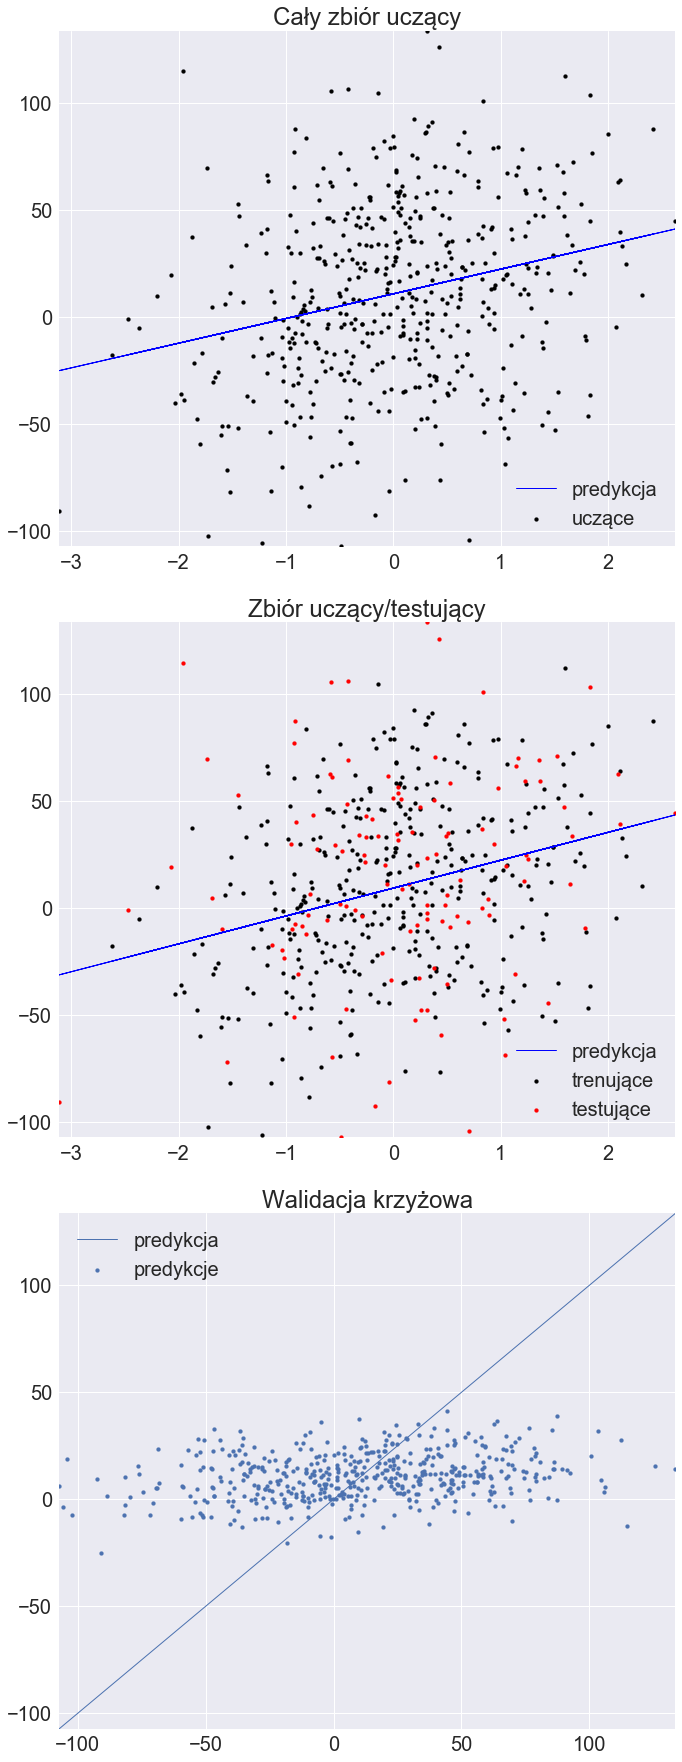

In [7]:
simple_linear_regression(noise=40)

### Problemy
1. kiedy używać $$\widehat{\theta}=(X^TX)^{-1}X^Ty$$
  * metoda jednokrokowa
  * zwraca wynik dokładny
    * funkcja kosztu jest wypukła i ma jedno minimum
2. ale
  * wymaga odwracania $X^TX$
    * odwracanie macierzy jest złożone obliczeniowo rzędu O($N^3$)
    * macierz $X^TX$ ma wymiar $N\times d\times D\times N=D\times D$
      * dla wysoko wymiarowych problemów są problemy z pamięcią
      * patrz metody redukcji wymiarowości

## Funkcje bazowe
1. model liniowy z funkcjami __bazowymi__ $\phi_j()$
$$\widehat{y}(x)=\theta_0+\sum_j\theta_j\phi_j(x)=\theta^T\Phi(x)$$
  * mogą wynikać ze wstępnej wiedzy o problemie
    * to doda jakąś wiedzę aprioryczną
  * to model liniowy bez względu na postać $\phi$
  * często funkcje wielomianowe $\phi_j(x)=x^j$
    * wielomiany są funkcjami globalnymi
    * zmiany w jednym obszarze wpływają na wszystkie inne
  * inne to funkcje __spline__: podział na podobszary i różne wielomiany w nich
  * częste są funkcje __lokalne__
    * gausowskie 
    $$\phi_j(x)=\exp\left(-\frac{(x-\mu_j)^2}{2\sigma^2}\right)$$
    * sigmoidalne $$\phi_j(x)=\sigma\left(\frac{x-\mu_j}{a}\right)$$
  * także Fourierowskie i wavelets

In [8]:
def draw_basis_functions(n = 10):
    fig, ax = plt.subplots(1, 3, figsize=(10,5))
    x = np.linspace(-1, +1, 100)
    for k in range(1, n):
        ax[0].plot(x, x ** k)
        ax[0].set_title('wielomianowe')
        ax[1].plot(x, np.exp(-((x - (2 * float(k) / float(n) - 1.)) ** 2) / 0.05))
        ax[1].set_title('gausowskie')
        ax[2].plot(x, 1. / (1. + np.exp(-(x - (2 * float(k) / float(n) - 1.)) / 0.05)))
        ax[2].set_title('sigmoidalne')

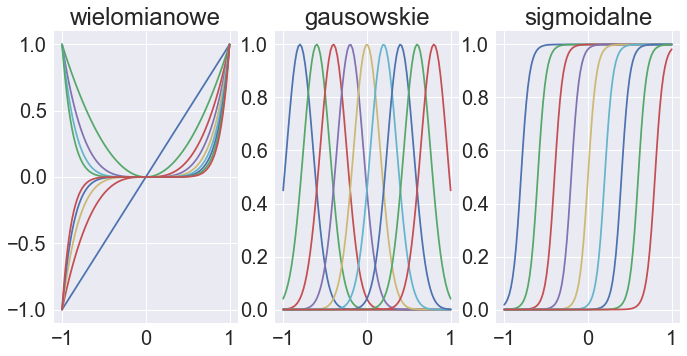

In [9]:
draw_basis_functions()

In [10]:
def cosmo_poly(n_examples=100, classifier = 'linear', loss='squared_loss', 
               penalty='l2', degree_list=[3], scalecenter=True):
    if classifier != 'linear' and classifier != 'sgd' and classifier!= "gaussian":
        print('Zły żądany typ modelu {}'.format(classifier))
        return

    fig, ax = plt.subplots(figsize=(19, 19))
    np.set_printoptions(precision=3)
    
    z_sample, mu_sample, dmu = generate_mu_z(n_examples, random_state=0)
    cosmo = Cosmology()
    z = np.linspace(0.01, 2, 1000)
    mu_true = np.asarray(list(map(cosmo.mu, z)))
    print(z_sample.shape)
    basis_mu = np.linspace(0, 2, 15)[:, None]
    basis_sigma = 3 * (basis_mu[1] - basis_mu[0])
    
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink']
    colors = sns.color_palette("Paired", len(degree_list) + 1)
    len_colors = len(colors)

    for k, dgr in enumerate(degree_list):
        # ekspansja wielomianow
        poly = PolynomialFeatures(degree=dgr)
        # obliczenie funkcji bazowych dla wszystkich przykladow
        X_sample = poly.fit_transform(z_sample[:, None])
        print(X_sample.shape)
        if scalecenter:
            # skalowanie i centrowanie
            scaler = preprocessing.RobustScaler().fit(X_sample)
            X_sample = scaler.transform(X_sample)

        # TODO dac opcje wyboru klasyfikatora takze na SGDRegression i mozliwosc regularyzacji
        if classifier == 'linear':
            clf = LinearRegression(normalize=False, fit_intercept=True)
            classifier_name = 'LinearRegression()'
        elif classifier == 'sgd':
            clf = SGDRegressor(loss=loss, penalty=penalty, max_iter=5000, tol=0.001)
            classifier_name = "SGDRegression()"
        elif classifier == "gaussian":
            mu = np.linspace(0, 1, X_sample.shape[1])[:, np.newaxis]
            sigma = 0.1
            clf = BasisFunctionRegression("gaussian", mu=mu, sigma=sigma)
            classifier_name ="Gaussian basis"

        # fit expanded
        clf.fit(X_sample, mu_sample)

        # obliczenie dofitowania do danych
        mu_sample_fit = clf.predict(X_sample)
        # skalowanie dla calego z
        X_z = poly.fit_transform(z[:, None])
        if scalecenter:
            X_z = scaler.transform(X_z)
        mu_fit = clf.predict(X_z)
        
        # blad dopasowanie do przykladow uczacych
        chi2_dof = (np.sum(((mu_sample_fit - mu_sample) / dmu) ** 2) / (len(mu_sample - 1)))
        # miara generalizacji
        true_chi2_dof = (np.sum(((mu_fit - mu_true)) ** 2) / (len(mu_true - 1)))

        ax.plot(z, mu_fit, '-', c=colors[k % len_colors], label=r'degree = {}, chi^2 = {}, gen = {}'.format(dgr, 
                                                                                               np.round(chi2_dof, 3),
                                                                                               np.round(true_chi2_dof, 3)))
        ax.plot(z, mu_true, '--', c='gray')
        ax.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1)
        print("{:4d}: coef: {}".format(dgr, clf.coef_))

    ax.set_xlim(0.01, 1.8)
    ax.set_ylim(36.01, 48)
    ax.set_xlabel('przesunięcie ku czerwieni')
    ax.set_ylabel('odleglość jasnościowa')
    ax.set_title('Wielomianowa regresja jasności względem przesunięcia do podczerwieni gwiazd używajac {}'.format(classifier_name))
    ax.legend(loc='best')

(100,)
(100, 2)
   1: coef: [ 0.     1.755]
(100, 3)
   2: coef: [ 0.     4.108 -1.602]
(100, 4)
   3: coef: [ 0.     7.055 -6.269  1.574]
(100, 5)
   4: coef: [  0.     10.875 -16.038   8.894  -1.668]
(100, 6)
   5: coef: [  0.     11.046 -16.681   9.69   -2.067   0.07 ]


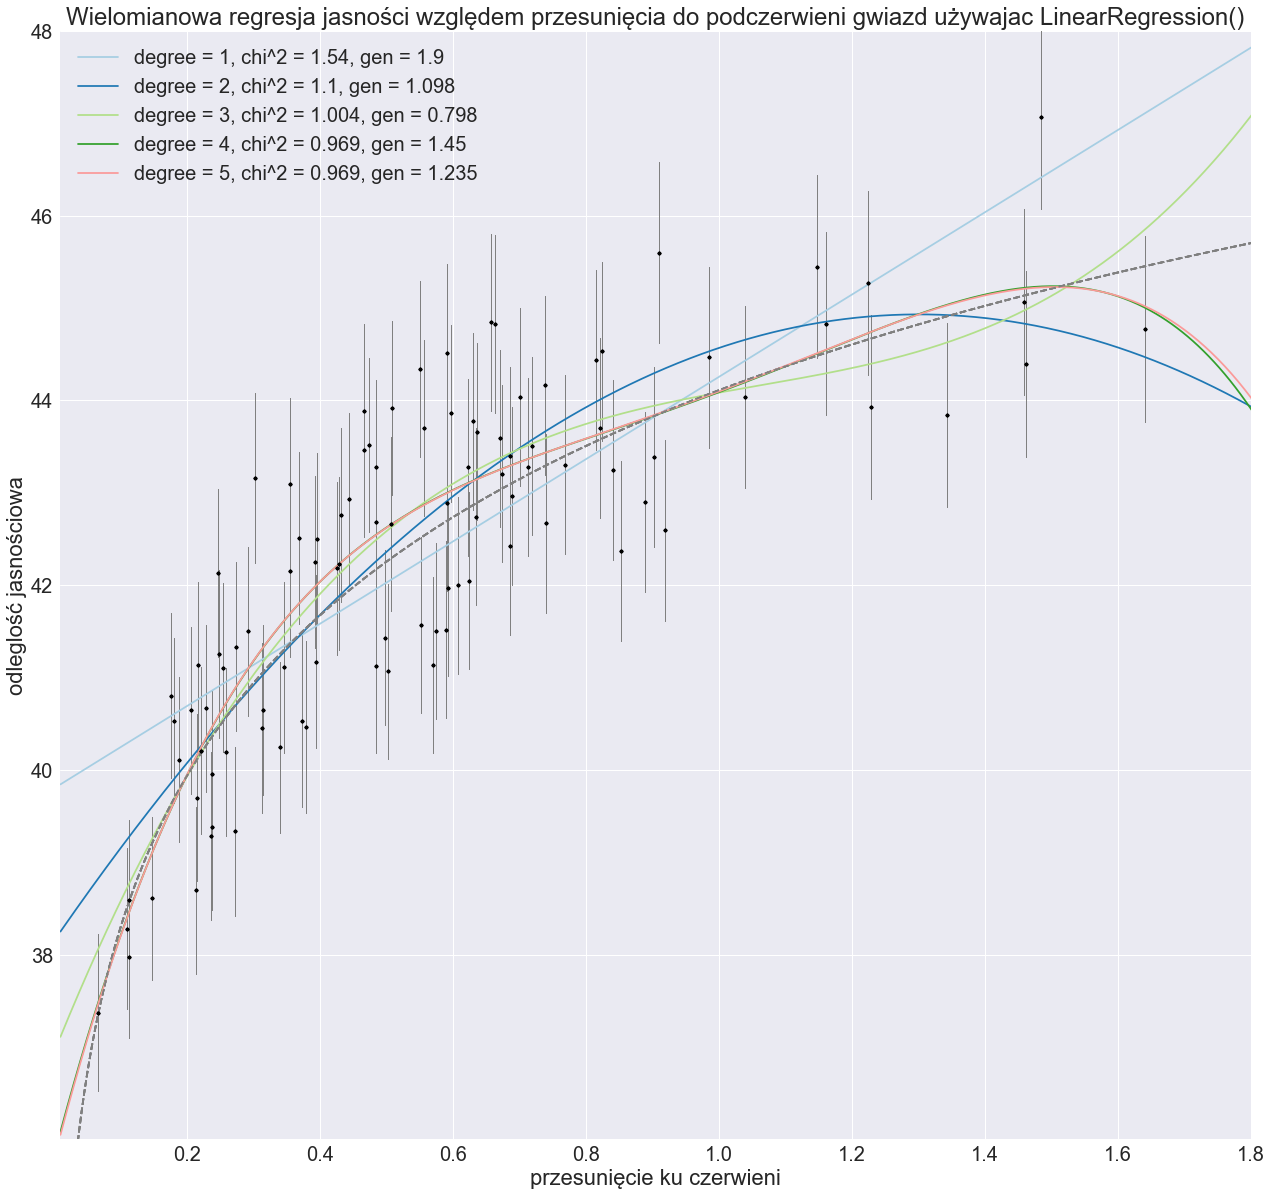

In [11]:
cosmo_poly(degree_list=[1,2,3,4,5], classifier='linear', penalty='l1')

(100,)
(100, 2)
   1: coef: [ 0.     1.846]
(100, 3)
   2: coef: [ 0.     1.857 -0.16 ]
(100, 4)
   3: coef: [ 0.     0.891  2.09  -0.94 ]
(100, 5)
   4: coef: [ 0.    -1.578  1.698  2.568 -1.217]
(100, 6)
   5: coef: [     0.     -1271.6    -2230.728  -3945.109  -6888.545 -11769.911]


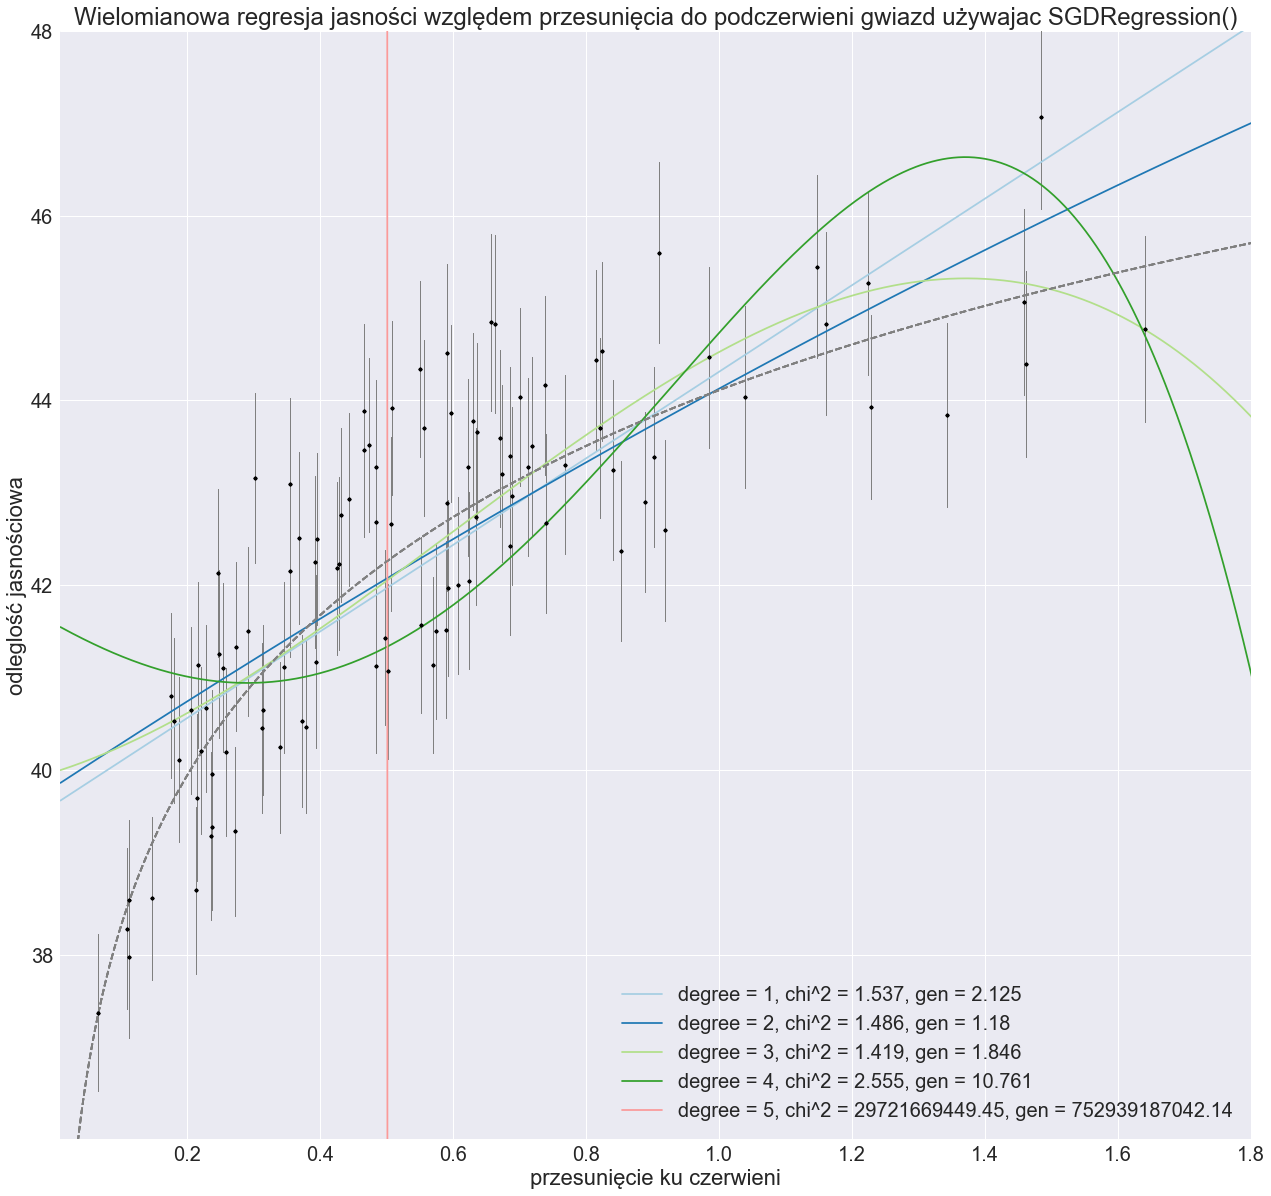

In [12]:
cosmo_poly(degree_list=[1,2,3,4,5], classifier='sgd', penalty='elasticnet')

# Metoda spadku gradientu
1. __odwracanie__ $\widehat{\theta}=(X^TX)^{-1}X^Ty$
  * wymiar $M\times M$
  * może być źle uwarunkowana
2. __iteracyjna__ metoda minimalizacji kosztu $L(\theta)$
  1. start of $\theta^0$
  2. $\theta^{i+1}=\theta^i+\eta\Delta\theta^i$
  
3. __rózniczkowalna__ $L()$ 
\begin{align}L(\theta^{i+1})&=L(\theta^i+\mu\Delta\theta^i)\\
&\simeq L(\theta^i)+\mu\nabla^TL(\theta^i)\Delta\theta^i
\end{align}
  * wybór $\Delta\theta^i$, że $$L(\theta^{i+1})-L(\theta^i) \simeq\eta\nabla^TL(\theta^i)\Delta\theta^i\lt0$$
  
<img src="../mum_figures/steepestdescent.png" width="85%"/>

4. to odpowiada __co najmniej__ rozwartemu kątowi między $\nabla\theta^{i}$ a $\Delta\theta^{i}$
    wektor gradientu $\nabla L(\theta^{(i)})$ jest ortogonalny do płaszczyzny stycznej do krzywej o równych wartościch funkcji kosztu w miejscu $\theta^{(i)}$
    * kąt między gradientem a poprawką $\Delta\theta^{(i)}$ jest __rozwarty__
  * __zbyt duże__ $\eta_i\|\Delta\theta^{(i)}\|$ spowoduje, że nowe $\theta^{i+1}$ może znaleźć się po _drugiej stronie krzywizny_
  
5. __aktualizacja__  $$\theta^{i+1}=\theta^i-\eta\nabla\,L$$
  * __liniowy__ model i __kwadratowa__ funkcja błędów
  $$\theta^{i+1}=\theta^i-\eta(y_k-\theta^{i^T}x_k)x_k$$
    * __błąd__ predykcji $(y_k-\eta^{i^T}x_k)$
    * __uczenie przez poprawianie błędów__
4. __współczynnik uczenia__ $\mu$
  * stały, mała wartość
  * __duży__ powoduje fluktuacje i ascylacje
    * problem ze zbieżnością
  * malejący w stosunku odwrotnym do kroku uczenia $t$
    * $v_0(1-\lambda\mu_0)^t$ dla poczętkowego $\mu_0$ i stałej $\lambda$
    * $\exp(-t/\tau)$ dla stałej $\tau$
    
    

In [39]:
def stochastic_gradient_regression(noise=35, max_iter=1000):
    # SGDRegressor jest metodą stochastycznego spadku gradientu
    fig, ax = plt.subplots(3, 1, figsize=(12, 28))
    n_samples = 500
    bias = 10.0
    np.set_printoptions(precision=3)
    #---
    X, y, true_coef = make_regression(n_samples=n_samples, n_features=1, 
                                      n_targets=1, bias=bias, noise=noise, coef=True)
    #---
    for i in range(2): ax[i].set_xlabel('x'); ax[i].set_ylabel('y')
    for i in range(2): ax[i].set_xlim((np.min(X), np.max(X))); ax[i].set_ylim([np.min(y), np.max(y)])
    #---
    regr = SGDRegressor(loss='squared_loss', penalty='none', 
                        max_iter=max_iter, verbose=0, tol=0.00001)
    regr.fit(X, y)
    #---
    print("Cały zbiór uczący")
    print("\ttrue/znalezione wsp.: {}/{}, bias = {}".format(true_coef, regr.coef_, bias))
    print("\tresidual error =", np.mean((regr.predict(X) - y) ** 2))
    print("\tscore =", regr.score(X, y))
    ax[0].scatter(X, y, color='black')
    pred = regr.predict(X)
    err = np.mean((y - pred) ** 2)
    ax[0].plot(X, regr.predict(X), color='blue', linewidth=1, 
               label='predykcja err = {}'.format(err))
    ax[0].set_title('Stochastyczny spadek gradientu na całych danych')
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    regr.fit(X_train, y_train)
    print("train/test model")
    print("\ttrue/znalezione wsp.: {}/{}, bias = {}".format(true_coef, regr.coef_, bias))
    print("\tresidual error =", np.mean((regr.predict(X_test) - y_test) ** 2))
    print("\tscore =", regr.score(X, y))
    ax[1].scatter(X_train, y_train, color='black')
    ax[1].scatter(X_test, y_test, color='red')
    err = np.sum((y_test - regr.predict(X_test)) ** 2) / len(y_test)
    ax[1].plot(X, regr.predict(X), color='blue', linewidth=1, 
               label='predykcja err = {}'.format(err))
    ax[1].set_title("Stochastyczny spadek gradientu na podziale danych train/test")

    # ewaluacja wyników przez walidację krzyżową
    pred = cross_val_predict(regr, X, y, cv=10)
    #---
    ax[2].set_xlim([np.min(y), np.max(y)])
    ax[2].set_ylim([np.min(y), np.max(y)])
    ax[2].plot([y.min(), y.max()], [y.min(), y.max()], lw=1, label='idealna predykcja')
    err = np.sum((y - pred) ** 2) / len(y)
    ax[2].scatter(y, pred, label='predykcje err = {}'.format(err))
    ax[2].set_title("Stochastyczny spadek gradientu z walidacją krzyżową")
    
    for i in range(3):
        ax[i].legend(loc='best')
#        ax[i].set_xlabel("Prawdziwe wartości")
#    ax[0].set_ylabel("Przewidziane")

    fig.tight_layout()

Cały zbiór uczący
	true/znalezione wsp.: 46.64689328988754/[ 44.318], bias = 10.0
	residual error = 602.782070672
	score = 0.778341661134
train/test model
	true/znalezione wsp.: 46.64689328988754/[ 43.856], bias = 10.0
	residual error = 608.412150062
	score = 0.778158117417


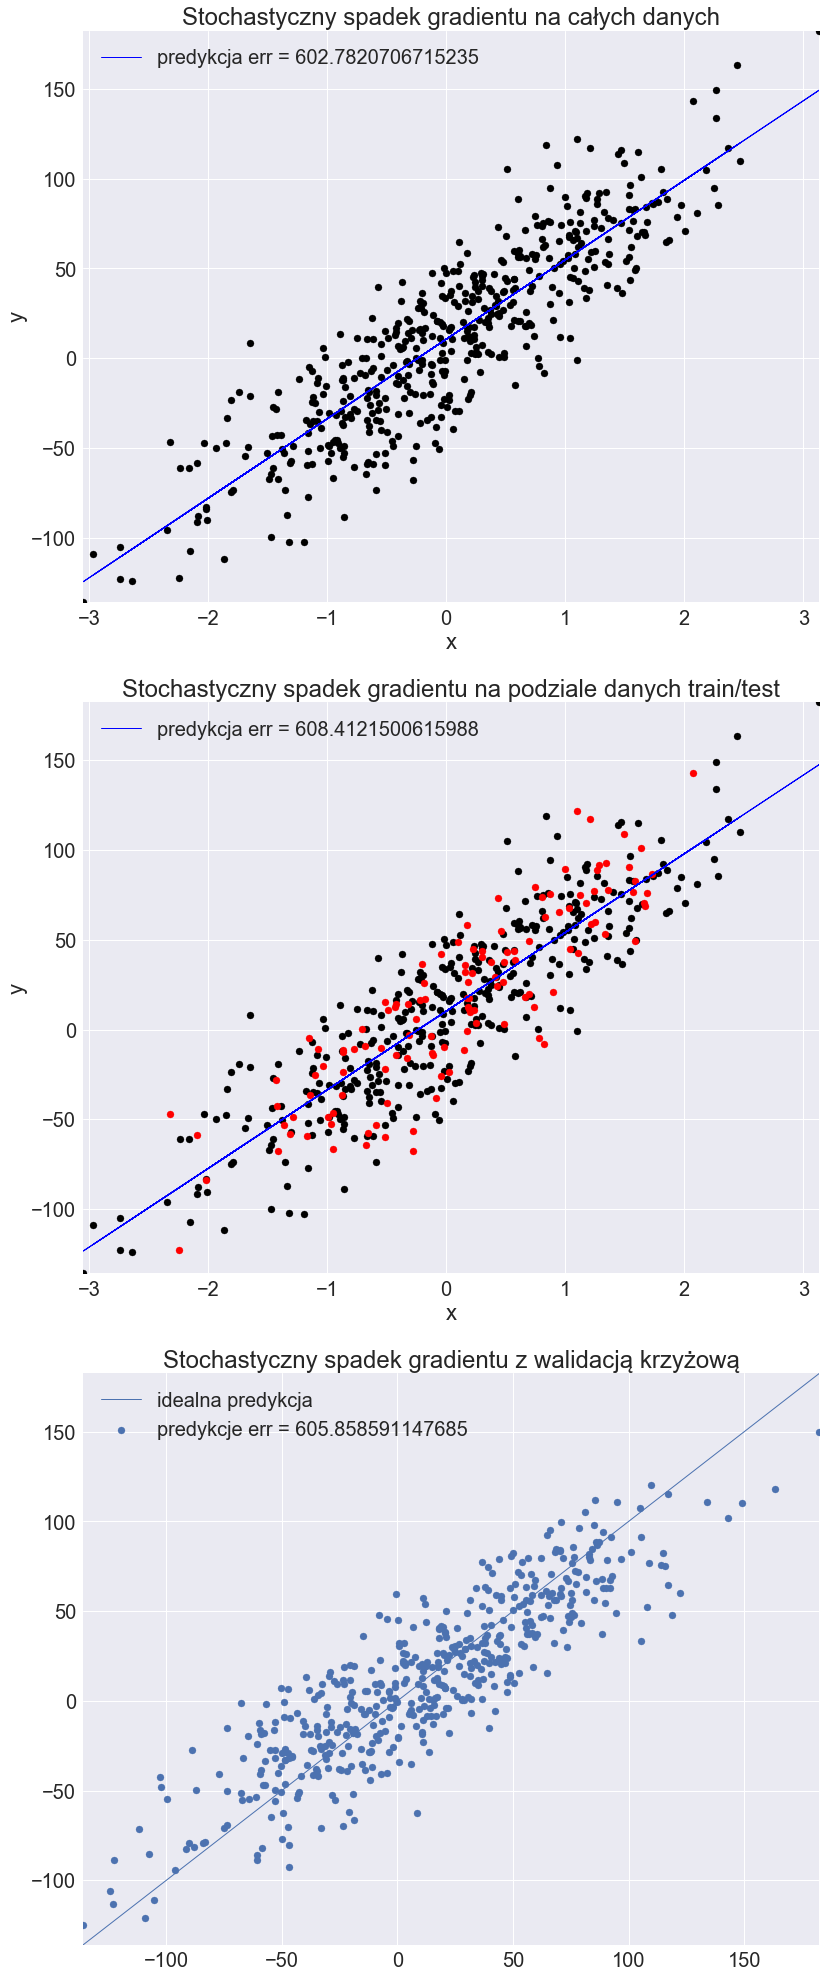

In [40]:
stochastic_gradient_regression(noise=25, max_iter=100000)

In [41]:
def draw_mu_dependent_mse(lmbd = 0.25, eps = 0.10, steps=30):
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    v0 = 1.
    steps = 25
    mu_vals = [0.1, 0.5, 1.0, (1. / lmbd), (1.1 / lmbd - eps)]
    colors = ['red', 'blue', 'magenta', 'violet', 'black']
    colors = sns.color_palette("Paired", len(mu_vals))
    for mu, col in zip(mu_vals, colors):
        ax.plot(range(steps), [v0 * (1. - mu * lmbd) ** i for i in range(steps)],
                color=col, label=r"$(1-\mu\lambda)^t,\;\;\mu$ = {:.3f}".format(mu))

    for mu, col in zip(mu_vals, colors):
        tau = 1 / (mu * lmbd)
        xx = np.linspace(0, steps, 100)
        ax.plot(xx, [np.exp(-float(i) / tau) ** i for i in xx], 
                c=col, ls='--', label=r"$\exp(-t/\tau), \tau$={:.3f}".format(tau))
    ax.plot(xx, [(1-3/(5+t)) for t in xx], color='magenta', label="Nesterov")
    ax.legend(loc='best')

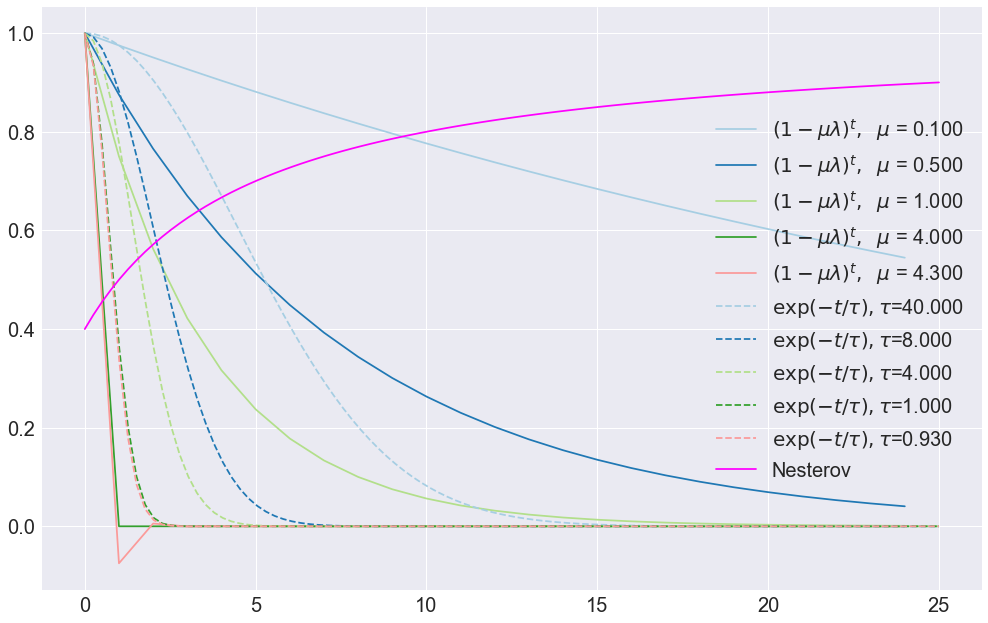

In [42]:
draw_mu_dependent_mse()

## Tryby uczenia
1. __stochastyczność__ algorytmu
2. __postać__ funkcji kosztu
  * __model liniowy__ wypukła, jedno minimum globalne
  * __nieliniowe modele__ wiele minimów lokalnych
3. __tryby__
  * __stochastyczny__ (_Stochastic Gradient Descent_) aktualizacja $\theta$ dla każdego przykładu
    * __szybki__ mało operacji
    * __chaotyczny__ losowe przeszukiwanie w różnych kierunkach
    * __lokalne__ poprawki
    * __GPU__ nie wykorzystane
  * __batch__ (_Gradient Descent_)
    * aktualizacja $\Delta\Theta=\frac{1}{N}\sum_i\Delta\theta(x_i)$
    * każda aktualizacja wymaga $N$ predykcji
    * __podobieństwo__ przykładów
      * niech $x_k$ i $x_j$ podobne
      * modyfikacja identyczna, stąd strata czasu
      * modyfikacja dla $x_j$ a __potem__ dla $x_k$ szybciej przybliża
    * __globalne__ poprawy
    * __GPU__ trudne dla dużych zbiorów
<img src="../mum_figures/stochastic-vs-batch-gradient-descent.png" width="80%">
  * __mini-batch__ 
    * aktualizacja dla małych batchy
      * zwykle kilka do kilkadziesiąt przykładów
    * redukcja wariancji poprawek
    * __podobieństwo__ wykorzystane
    * __szybka__ zbieżność
    * __GPU__ możliwe optymalne wykorzystanie

## Przyspieszenie uczenia
1. __stochastyczność__ 
  * uczenie zwykle przebiega w podobnym kierunku
  * modyfikacja stochastyczna _nie wykorzystuje_
2. __powierzchnia funkcji kosztu__ 
  * __elipsoida__ dla problemów regresji liniowej
    * __bardzo wąska__ utrudni
    * __normalizacja__ 
      * bardzo różny wpływ atrybutów
  * __bardzo zróżnicowana__ dla złożonych modeli
    * wiele minimów lokalnych
      * wprowadzi oscylacje
    * szerokie _plateau_
      * niska wartość gradientu
      * powolne uczenie
2. __współczynnik uczenia__ $\eta$
  * __duży__
    * niestabilne uczenie
    * możliwość przechodzenia nad minimum
    * szybkie ale niestabilne
  * __mały__
    * stabilne ale powolne
    
    

### Momentum
1. __pamięć__
  * podążać w kierunku największego spadku
  *. pamiętać poprzednie dlazwolnienia/przyspieszenia
1. __szereg Taylora__
$$L(\theta^t+v_t)=L(\theta^t)+v_t\nabla{}L(\theta^t)+O(v_t^2)$$
  * ustalenie $$v_t=-\eta\nabla{}L(\theta^t)$$ __zminiejszy__ wartość $L()$
2. __metoda momentum__
 $$\begin{align}v_{t+1}&=-\eta\nabla{}L(\theta^{(t)}+\alpha{}v_{t}\\
 \theta^{(t+1)}&=\theta^{(t)}+v_{t}
 \end{align}$$
   * __oscylacje__ tłumi
   * __plateau__ przyspiesza
   * $\alpha\in[0,1)$, zwykle $\alpha=0.9$
3. __brak spojrzenia wprzód__
  * pamięta poprzednie by podążać w głównym kierunku
  * nie patrzy wprzód
 
 ![alt text][logo]
 [logo]: https://cdn-images-1.medium.com/max/1600/1*XVFmo9NxLnwDr3SxzKy-rA.gif

### Nesterov accelerated gradient NAG
1. __spojrzenie wprzód__
  * __zgrubne__ oszacowanie _prawdopodobnego_ nowego $\theta=\theta+v_t$
  * __gradient__ w nowym miejscu
1. __rozszerzenie__ momentum z _ekstrapolacją_
$$\begin{align}
v_{t+1}&=(1+\alpha)\theta^t-\alpha\theta^{(t-1)}\\
\theta^{(t+1)}&=v_{t+1}-\eta\nabla{}L(v_{t+1})=\theta^{t}+\alpha(\theta^t-\theta^{t-1})-\eta\nabla{}L(v_{t+1})
\end{align}$$
  * przesunięcie w kierunku gradientu i momentum
  * gradient w _nowym_ miejscu
3. __optymalny__ dla optymalizacji wypukłej
  * __wygładza__ ostatnie dwie wartości $\theta$
  * __ekstrapoluje__ obliczając gradient w tym nowym punkcie
  * tak jak momentum __kontunuuje__ poprawianie $\theta$ w poprzednim kierunku
  $$\begin{align}
  v_{t+1}&=-\eta\nabla{}L(\theta^{(t)}+\alpha{}v_t)+\alpha{}v_t\\
  \theta^{(t+1)}&=\theta^{(t)}+v_{t+1}
  \end{align}$$
    
4. __parametry__
  * __uczenia__ $\eta$ ustalony
    * ewentualne modyfikacje w eksperymentach
  * __momentum nesterova__ schemat $\alpha_t=1-3/(5+t)$
    * rosnąca
    * w dalszych iteracjach dalej wybiega wprzód

### Adagrad
1. __adaptacja gradientu__
  * __większe__ poprawki dla rzadkich parametrów
  * __mniejsze__ dla częstych
  * dobry dla __rzadkich__ danych (sparse)
2. __zróżnicowanie__ współczynnika uczenia $\eta_{ti}$
$$\begin{align}
g_{t,i}&=\nabla{}L(\theta^t_i)\\
\theta_i^{t+1}&=\theta^t_i-\frac{\eta}{\sqrt{G_{t,ii}+\epsilon}}\\
G_{t,ii}&=\sum_k=1^tg_{t,i}^2
\end{align}$$
  * $G_{t,ii}$ suma kwadratów gradientów dla $\theta_i$
    * bez pierwiastka działa słabo!
3. __urównoleglenie__ łatwe
4. __akumulacja__ kwadratów gradientów
  * współczynnik uczenia bardzo maleje
  * przestaje się uczyć

### Adadelta
1. __ograniczenie__ akumulacji kwadratów gradientów do okienka
  * __krocząca średnia__
  $$\begin{align}
  E[g^2]_t&=\gamma{}E[g^2]_{t-1}+(1-\gamma)g_t^2\\
  \theta^{t+1}&=\theta^t-\frac{\eta}{\sqrt{E[g^2]_t+\epsilon}}g_t\\
  &=\theta^t-\frac{\eta}{RMS[g]_t}g_t
  \end{align}$$
  * $RMS[g]$ to średnia suma kwadratów (root mean square)
2. __upodobnienie__ szybkości poprawek do poprawek
  * zamiast $\eta$ wziąć ich sumę kroczącą
  $$\begin{align}
  E[\Delta\theta^2]_t&=\gamma{}E[\Delta\theta^2]_{t-1}+(1-\gamma)\Delta\theta_t^2\\
  \theta^{t+1}&=\theta^t-\frac{\sqrt{E[\Delta\theta^2]_t}}{\sqrt{E[g^2]_t+\epsilon}}g_t\\
  &=\theta^t-\frac{RMS[\Delta\theta^2]_t}{RMS[g]_t}g_t
  \end{align}$$
  * __wspóczynnik uczenia__ jako proporcja
    * $RMS$ poprawek do
    * $RMS$ gradientów
  * __eliminacja__ stałej uczenia z parametrów
3. __zabezpieczenie__ przed zmniejszaniem się współczynnika uczenia

### RMSProp
1. __cel__ uniezależnienie Adagrad od spadku współczynnika
$$\begin{align}
  E[g^2]_t&=\gamma{}E[g^2]_{t-1}+(1-\gamma)g_t^2\\
  \theta^{t+1}&=\theta^t-\frac{\eta}{\sqrt{E[g^2]_t+\epsilon}}g_t\\
  &=\theta^t-\frac{\eta}{RMS[g]_t}g_t
  \end{align}$$
  * zaproponowane przez Hintona
  
![alt text][logo]
[logo]:   http://ruder.io/content/images/2016/09/saddle_point_evaluation_optimizers.gif

### Adam
* _wrócimy do niego..._

### AdaMax
* _wrócimy do niego..._

### Nadam
* _wrócimy do niego..._

## Wybór podejścia
1. __rzadkie dane__ to adaptacja parametrów
2. RMSprop i Adadelta bardzo podobne
3. Adam dodaje lepsze podejście do biasu
4. SGD także możliwy
  * __annealing__ konieczne zmniejszanie $\eta$ wraz z liczbą epok
  * __małe__ wartości $\eta$
5. __urównoleglenie__ uczenia
  * wiele równoległych kopii
  * centarlny serwer łączący modyfikacje
6. __mieszanie__ przykładów uczących
  * identyczne sekwencje prowadzą do cykli
  * __mieszanie__ przykładów _po każdej_ epoce
  * zależy bardzo od problemów
    * uczenie dla szeregów czasowych
7. __normalizacja__ parametrów
  * początkowo parametry $\sim\mathcal{N}(0, 1)$
  * pozwala na wyższe wartości $\eta$

# Inne modele regresji

## Regresja kernelowa
1. __kernel__ $K(x_i,x)$ _lokalny_ dla każdej danej
  * zależy tylko od odległości od innych punktów
  * malejąca wraz z odległością
2. __model__
  $$f(x\mid K)=\frac{\sum_{i=1}^N K(\|x_i-x\|/h)\,y_i}{\sum_{i=1}^N K(\|x_i-x\|/h)}$$
3. __własności__
  * parametr $h$ definiuje _szerokość_
    * maleje wraz z liczbą danych
  * metoda ściąga do wartości najbliższych innych punktów

## Modele nieliniowe
1. __transformacje__
  * wiele problemów nieliniowych można zamienić na liniowe $$y=A\exp(Bx)\hskip{1.5em}\longrightarrow\hskip{1.5em}z=K+Bx\;\;\text{gdzie}\; z=\log(y)$$
  * często pociąga to jednak inne komplikacje
2. __Levenberg_Marquardt__
3. __sieci neuronowe__

# Outliers
1. __outliers__ dane, które nie należą do poprawnego problemu
  * niedokładności w pamiarach
  * gdy był znany rozkład błędu $e(y_i\mid y)$, to można go uwzględnić
  * _regularyzacje_ pozwalają na zmniejszenie wpływu 
    * dane, które mniej pasują do modelu, zaczynają mieć mniejszy na niego wpływ
    * wymagają metod iteracyjnych
2. __pruning__ danych
  * sukcesywne usuwanie danych _nie pasujących_ do zbudowanego modelu
  * __kosztowne__ wymagają wielokrotnych powtórzeń

In [17]:
def try_ransac(n_samples=1000, noise=10, out_frac=0.1):
    n_outliers = int(out_frac * n_samples)
    X, y, coef = make_regression(n_samples=n_samples, n_features=1, n_informative=1,
                                noise=noise, coef=True)
    X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
    y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)
    
    lr = LinearRegression()
    lr.fit(X, y)
    
    ransac = RANSACRegressor()
    ransac.fit(X, y)
    inlier_mask = ransac.inlier_mask_
    outlier_mask = np.logical_not(inlier_mask)
    
    line_X = np.arange(X.min(), X.max())[:, np.newaxis]
    line_y = lr.predict(line_X)
    line_y_ransac = ransac.predict(line_X)

    fig, ax = plt.subplots(figsize=(15, 15))
    ax.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.',
               label='Inliers')
    ax.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.',
               label='Outliers')
    ax.plot(line_X, line_y, color='navy', label='Regresja liniowa')
    ax.plot(line_X, line_y_ransac, color='cornflowerblue',
            label='RANSAC')
    ax.legend(loc='best')

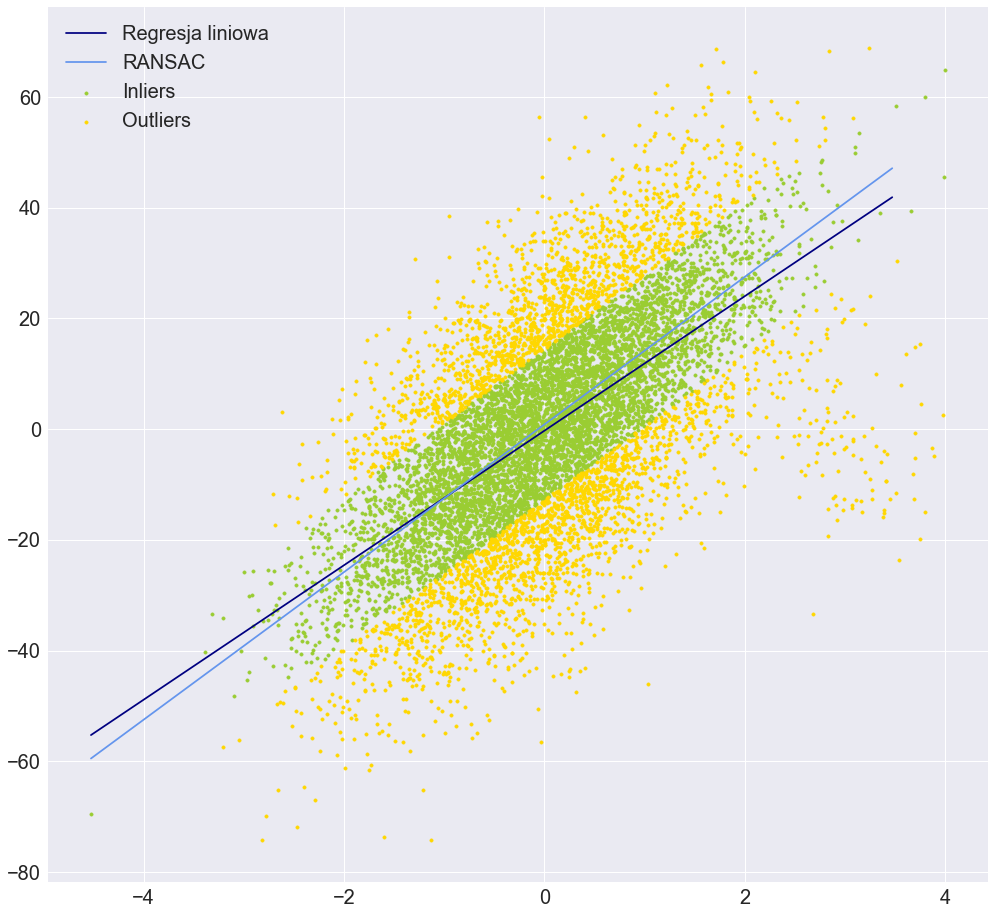

In [18]:
try_ransac(n_samples=10000, out_frac=0.01, noise=15)

## Odporna funkcja kosztu
1. __minimalizuje__ $$\sum_i e(y_i\mid y)$$
1. __odporność na outliers__
$$\begin{align}
t&=y_i-y\\
\phi(t)&=\begin{cases}
\frac{1}{2}t^2\hskip{4em}|t|\leq c\\
c|t|-\frac{1}{2}t^2\hskip{2em}|t|>c
\end{cases}
\end{align}$$
gdzie $t=y_i-y$

  * $\phi()$ ciągła i różniczkowalna
  * gausowski koszt błędu dla małych
  * wykładniczy dla dużych

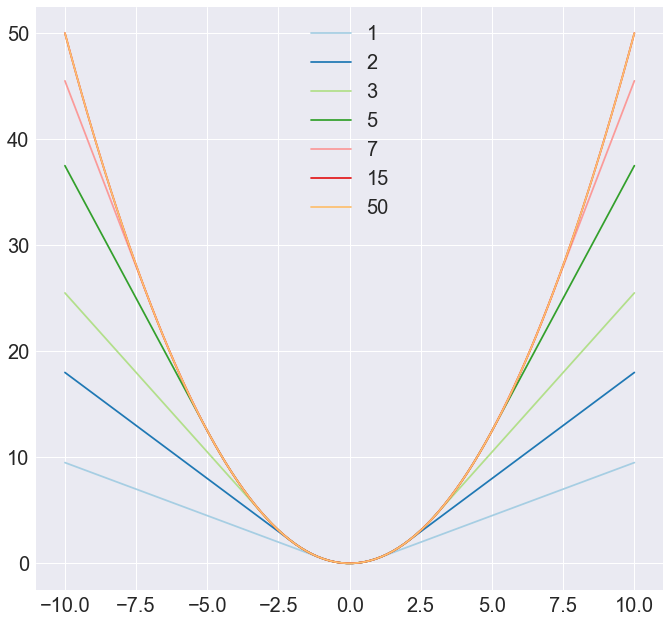

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
x_space = np.linspace(-10, 10, 100)
c_list = (1, 2, 3, 5, 7, 15, 50)
f = lambda thr, val: val ** 2 / 2 if np.abs(val) < thr \
    else thr * np.abs(val) - thr ** 2 / 2
colors = sns.color_palette("Paired", len(c_list))
for k, c in enumerate(c_list):
    y = [f(c, x) for x in x_space]
    ax.plot(x_space, y, color=colors[k], label="{}".format(c))
ax.legend(loc='best')